# STA 141B: Homework 2

Fall 2018

## Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Ryan

Last Name: Gosiaco

Student ID: 912819444

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


## Part 1: Image Processing Basics

Computers use tiny dots called _pixels_ to display images. Each pixel is stored as an array of numbers that represent color intensities.

__Example.__ In an 8-bit grayscale image, each pixel is a single number. The number represents light intensity ranging from black (0) to white (255).

__Example.__ In a 24-bit RGB color image, each pixel is an array of 3 numbers. These numbers range from 0 to 255 and represent red, green, and blue intensity, respectively. For instance, `(0, 0, 255)` is <span style="color:#00F">bright blue</span> and `(255, 128, 0)` is <span style="color:#FF8000">orange</span>  We say that these numbers constitute the red, green, and blue *channels* of the image.

In this assignment, you'll use Python and NumPy to manipulate 24-bit RGB color images.

You can use `Image.open()` from the Python imaging library (PIL) to open an image:

In [4]:
from PIL import Image

# Cat image from https://unsplash.com/photos/FqkBXo2Nkq0
cat_img = Image.open("cat.png")

Images display inline in Jupyter notebooks:

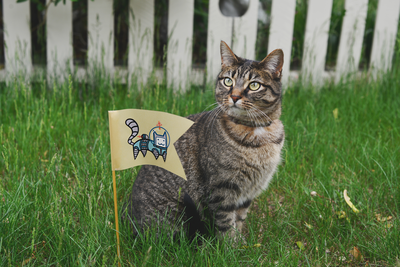

In [3]:
cat_img

In a Python terminal, you can display the image in a new window with `.show()` instead.

NumPy can convert images to arrays:

In [5]:
import numpy as np

cat = np.array(cat_img)

To convert an array back to an image (for display) use the function below:

In [6]:
def as_image(x):
    """Convert an ndarray to an Image.
    
    Args:
        x (ndarray): The array of pixels.
        
    Returns:
        Image: The Image object.
    """
    return Image.fromarray(np.uint8(x))

__Exercise 1.1.__ How many dimensions does the `cat` array have? What does each dimension represent?

In [7]:
cat.shape, cat.dtype

((267, 400, 3), dtype('uint8'))

The `cat` array has 3 dimensions, the first representing height of the image in pixels, the second representing width of the image in pixels, and the last representing the color values (Red, Green, Blue) which can range from 0 to 255.

__Exercise 1.2.__ Use `.copy()` to copy the cat array to a new variable. Swap the green and blue color channels in the copy. Display the result.

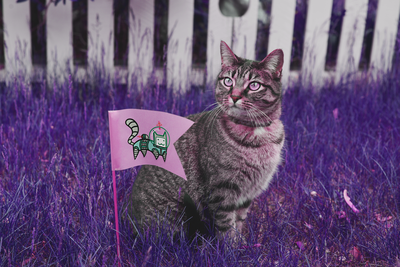

In [8]:
cat_swap = cat.copy()

#iterate through array and swap values
for i in range(267):
    for j in range(400):
        green = cat_swap[i, j, 1]
        blue = cat_swap[i, j, 2]
        cat_swap[i, j, 1] = blue
        cat_swap[i, j, 2] = green
        
as_image(cat_swap)


__Exercise 1.3.__ Why is `.copy()` necessary in exercise 1.2? What happens if you don't use `.copy()`?

`.copy()` is necessary because if you do not use `.copy()`, whatever modifications you do to the "new" array affects the original array because if you just do `cat_swap = cat` then python is essentially renaming the original `cat` array to `cat_swap` instead of copying the contents of `cat` to a new `cat_swap` array.

__Exercise 1.4.__ Flip the blue color channel from left to right. This means that the blue channel values should be swapped such that the $(i,j)$th pixel swapes the blue value with the $(n-i,j)$th pixel values if the image is $n$ pixels wide. Display the resulting image. _Hint: see the NumPy documentation on array manipulation routines._

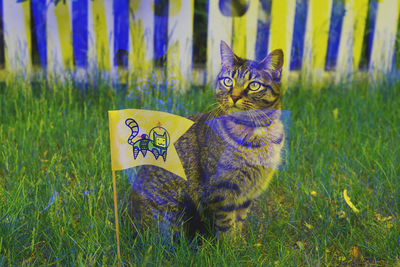

In [9]:
cat_bs = cat.copy()

cat_bs[:,:,2]=np.fliplr(cat_bs[:,:,2])

as_image(cat_bs)

## Part 2: Singular Value Decomposition

Suppose $X$ is an $n \times p$ matrix (for instance, one color channel of the cat image). The _singular value decomposition_ (SVD) factors $X$ as $X = UD V^T$, where:

* $U$ is an $n \times n$ orthogonal matrix
* $D$ is an $n \times p$ matrix with zeroes everywhere except the diagonal
* $V$ is an $p \times p$ orthogonal matrix

Note that a matrix $A$ is _orthogonal_ when $A^T A = I$ and $AA^T = I$.

__Example.__ We can use NumPy to compute the SVD for a matrix:

In [9]:
x = np.array(
    [[0, 2, 3],
     [3, 2, 1]]
)
u, d, vt = np.linalg.svd(x)
# Here d is 2x2 because NumPy only returns the diagonal of D.
print("u is:\n", u, "\nd is:\n", d, "\nv^T is:\n", vt)

u is:
 [[-0.68145174 -0.73186305]
 [-0.73186305  0.68145174]] 
d is:
 [ 4.52966162  2.54600974] 
v^T is:
 [[-0.48471372 -0.62402665 -0.6128975 ]
 [ 0.80296442 -0.03960025 -0.59470998]
 [ 0.34684399 -0.78039897  0.52026598]]


If we let

* $u_i$ denote the $i$th column of $U$
* $d_i$ denote the $i$th diagonal element of $D$
* $v_i$ denote the $i$th column of $V$

then we can write the SVD as $\ X = UDV^T = d_1 u_1 v_1^T + \ldots + d_m u_m v_m^T\ $ using the rules of matrix multiplication. In other words, the SVD decomposes $X$ into a sum!

If we eliminate some of the terms in the sum, we get a simple approximation for $X$. For instance, we could eliminate all but first 3 terms to get the approximation $X \approx d_1 u_1 v_1^T + d_2 u_2 v_2^T + d_3 u_3 v_3^T$. This is the same as if we:

* Zero all but the first 3 diagonal elements of $D$ to get $D_3$, then compute $X \approx UD_3V^T$
* Eliminate all but the first 3 columns of $V$ to get $p \times 3$ matrix $V_3$, then compute $X \approx UDV_3^T$

We always eliminate terms starting from the end rather than the beginning, because these terms contribute the least to $X$.

Why would we want to approximate a matrix $X$?

In statistics, _principal components analysis_ uses this approximation to reduce the dimension (number of covariates) in a  centered (mean 0) data set. The vectors $d_i u_i$ are called the _principal components_ of $X$. The vectors $v_i^T$ are called the _basis vectors_. Note that both depend on $X$. The dimension is reduced by using the first $q$ principal components instead of the original $p$ covariates. In other words, the $n \times p$ data $X$ is replaced by the $n \times q$ data $UD_q = XV_q$

In computing, this approximation is sometimes used to reduce the number of bits needed to store a matrix (or image). If $q$ terms are kept, then only $nq + pq$ values (for $XV_q$ and $V_q^T$) need to be stored instead of the uncompressed $np$ values.

__Exercise 2.1.__ Write the functions described below.

* A function that takes a matrix $X$ and returns its principal component matrix $XV_q$ and basis matrix $V_q^T$. This function should also take the number of terms kept $q$ as an argument.

* A function that takes a principal component matrix $XV_q$ and basis matrix $V_q^T$ and returns an approximation $\hat{X}$ for the original matrix.

As usual, make sure to document your functions. Test your function on the red color channel of the cat image. What's the smallest number of terms where the cat is still recognizable as a cat?

In [92]:
def components(X, q):
    """Performs SVD on matrix to find principal component matrix and basis matrix

    Args:
        X (ndarray): The array of pixels.
        q (int): The number of terms kept
    Returns:
        xv_q: Principal component matrix of X
        vq_t: Basis matrix of X
    """
    u, d, vt = np.linalg.svd(X)
    vq_t = vt[:q,:]
    xv_q = np.dot(X, vq_t.T)
    
    return (xv_q, vq_t)

def approximate(xv_q, vq_t):
    """Uses principal component matrix and basis matrix to create an approximation of X

    Args:
        xv_q: Principal component matrix of X
        vq_t: Basis matrix of X
    Returns:
        approx (ndarray): Approximation of X
    """
    approx = np.dot(xv_q, vq_t)
    return approx

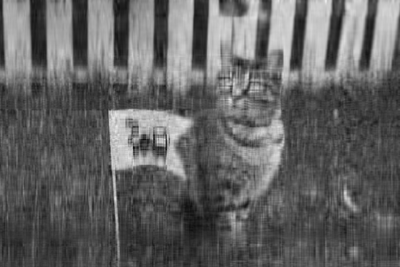

In [93]:
#copy cat and take only red color channel
orig_cat = cat.copy()
redcat = orig_cat[:,:,0]

#run SVD with q=20
cat_comp = components(redcat, 20)
cat_approx = approximate(cat_comp[0], cat_comp[1])

as_image(cat_approx)

The smallest number of terms where the cat is still recognizable is around `q=20` terms.

__Exercise 2.2.__ You can check the number of bytes used by a NumPy array with the `.nbytes` attribute. How many bytes does the red color channel of the cat image use? What is minimal amount of data necessary to store in order to reconstruct the approximation $\hat X$.  How many bytes does the compressed version use when 10 terms are kept? What percentage of the original size is this?

In [94]:
#run SVD with q=10 and print out sizes
comp_ten = components(orig_cat[:,:,0], 10)
approx_ten = approximate(comp_ten[0], comp_ten[1])
print("Number of bytes in red channel for original image:",orig_cat[:,:,0].nbytes)
print("Number of bytes in approximation X for 10 terms:", approx_ten.nbytes)
print("Number of bytes in sum of compressed matrices for 10-term image:", comp_ten[0].nbytes+comp_ten[1].nbytes)
print("Percent change in bytes:",(comp_ten[0].nbytes+comp_ten[1].nbytes)/orig_cat[:,:,0].nbytes)

Number of bytes in red channel for original image: 106800
Number of bytes in approximation X for 10 terms: 854400
Number of bytes in sum of compressed matrices for 10-term image: 53360
Percent change in bytes: 0.49962546816479403


## Part 3: Fast Fourier Transform

The 2-dimensional _fast Fourier transform_ (FFT) is another way to decompose a matrix $X$ as a sum. The math behind the FFT is interesting but fairly advanced.

__Example.__ We can use NumPy to compute the FFT for a real-valued matrix:

In [12]:
x = np.array(
    [[0, 2, 3],
     [3, 2, 1]]
)
x_coef = np.fft.rfft2(x)
print(x_coef)

[[ 11.+0.j          -1.+0.j        ]
 [ -1.+0.j          -4.+1.73205081j]]


The return value is a matrix of complex coefficients. We can also use NumPy to invert the FFT:

In [13]:
# The second argument tells NumPy the dimensions of the original X.
np.fft.irfft2(x_coef, x.shape)

array([[ 0.,  2.,  3.],
       [ 3.,  2.,  1.]])

The FFT coefficients serve a role similar to the $d_i$ terms in the SVD. Terms in the FFT sum (which wasn't displayed) can be eliminated by setting coefficients to zero. This means we can also use the FFT for dimension reduction or file compression! For the FFT, we always eliminate terms starting from the bottom right corner of the coefficient matrix, because the terms for these coefficients contribue the least to $X$. As before, we use $q$ to denote the number of terms kept.

For file compression, the FFT differs from the SVD in an important way: we don't need to store the basis matrix. This is because the FFT always uses the same basis matrix regardless of $X$.

__Example.__ To compress the matrix in the previous example, we could eliminate one term:

In [14]:
# Zero the coefficient in the bottom right corner.
x_coef[:, 1:] = 0
x_coef[1:, :] = 0
print("x_coef is:\n", x_coef, "\nx approx is:\n", np.fft.irfft2(x_coef, x.shape))

x_coef is:
 [[ 11.+0.j   0.+0.j]
 [  0.+0.j   0.+0.j]] 
x approx is:
 [[ 1.83333333  1.83333333  1.83333333]
 [ 1.83333333  1.83333333  1.83333333]]


As you can see, for a matrix this small it is hard for this procedure to give a poor approximation.

__Exercise 3.1.__ Write the functions described below.

* A function that returns the FFT coefficients and dimensions of a matrix $X$. This function should also accept an argument for where to start zeroing-out the last $k$ rows and columns of the coefficient matrix.
* A function that takes FFT coefficients and dimensions and returns an approximation $\hat{X}$ for the original matrix.

Make sure to document your functions. Test your function on the red color channel of the cat image. What's the smallest number of terms where the cat is still recognizable as a cat?

In [58]:
def fft_coeff(X, k):
    """Performs FFT on matrix to find coefficient matrix and dimensions of matrix X

    Args:
        X (ndarray): The array of pixels.
        k (int): The last k rows and columns that are turned to zero
    Returns:
        x_coeff: Coefficient matrix of X
        X.shape: The dimensions of the original matrix
    """
    x_coeff = np.fft.rfft2(X)
    x_coeff[:, k:] = 0
    x_coeff[k:, :] = 0
    return (x_coeff, X.shape)
 
def fft_approx(coeff, dim):
    """Uses coefficient matrix and dimension of original matrix to create an approximation of X

    Args:
        coeff:Coefficient matrix of X
        dim: Dimension of X
    Returns:
        np.fft.irfft2(coeff, dim) (ndarray): Approximation of X
    """
    return np.fft.irfft2(coeff, dim)
    

10000


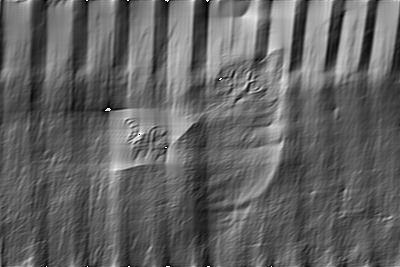

In [95]:
#use already copied redcat array from earlier and run FFT where k=100
red_coeff = fft_coeff(redcat, 100)
red_approx = fft_approx(red_coeff[0], red_coeff[1])

#find the number of nonzero elements which is equivalent to q
q = np.count_nonzero(red_coeff[0])
print(q)


as_image(red_approx)

The smallest number of terms where the cat is still recognizable is around when `k=100` which translates to `q=10000` terms kept.

__Exercise 3.2.__ For both decompositions (SVD and FFT), examine the number of bytes and image clarity at several values of $q$. Which decomposition would you expect to work better for dimension reduction? Which decomposition would you expect to work better for file compression? Think about this carefully and explain your reasoning.

In [96]:
#these functions are for running SVD or FFT size comparisons faster, rather than retyping everything
def svd_size(image, q):
    """Performs SVD on matrix to find principal component matrix and basis matrix
        and prints out the number of bytes the component matrix takes
    Args:
        image (ndarray): The array of pixels.
        q (int): The number of terms kept
    Returns:
        approx: Approximation of image
    """
    comp = components(image, q)
    approx = approximate(comp[0], comp[1])
    print("SVD_" + str(q) + ":" ,comp[0].nbytes + comp[1].nbytes)
    return approx

def fft_size(image, k):
    """Performs FFT on matrix to find coefficient matrix and dimensions of matrix X

    Args:
        image (ndarray): The array of pixels.
        k (int): The last k rows and columns that are turned to zero
    Returns:
        approx: Approximation of image
    """
    coeff = fft_coeff(image, k)
    approx = fft_approx(coeff[0], coeff[1])
    print("FFT_" + str(k*k) + ":", coeff[0].nbytes)
    return approx

SVD_16: 85376


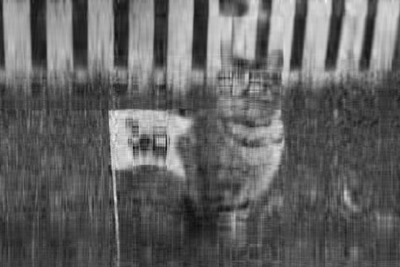

In [97]:
#q=16
#k=4 which translates to q=16
svd_16 = svd_size(redcat, 16)
as_image(svd_16)

FFT_16: 858672


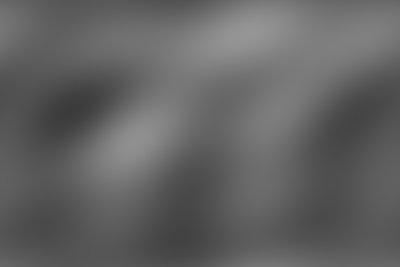

In [37]:
fft_16 = fft_size(redcat, 4)
as_image(fft_16)

SVD blurry but recognizable whereas FFT is very blurry and unrecognizable.
<br>
SVD takes up 85,376 bytes with 16 components and FFT takes up 858,672 bytes with 16 components.

SVD_64: 341504


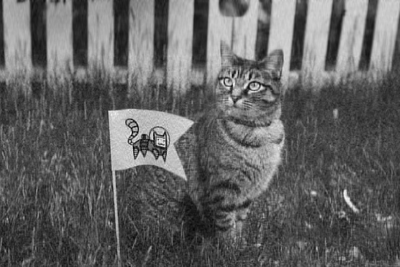

In [65]:
#q=64
#k=8 which translates to q=64
svd_64 = svd_size(redcat, 64)
as_image(svd_64)

FFT_64: 858672


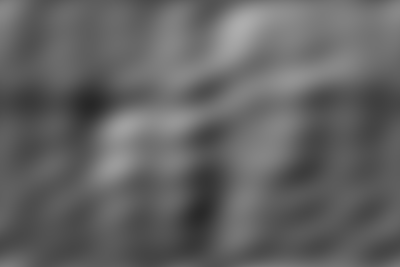

In [66]:
fft_64 = fft_size(redcat, 8)
as_image(fft_64)

SVD is very similar to original image whereas FFT is very blurry and unrecognizable.
<br>
SVD takes up 341,504 bytes with 64 components and FFT takes up 858,672 bytes with 64 components.

SVD_90: 480240


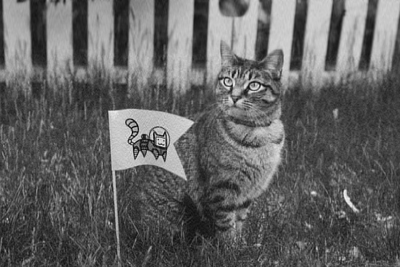

In [76]:
#q=90
#k=30 which translates to q=90
svd_90 = svd_size(redcat, 90)
as_image(svd_90)

FFT_8100: 858672


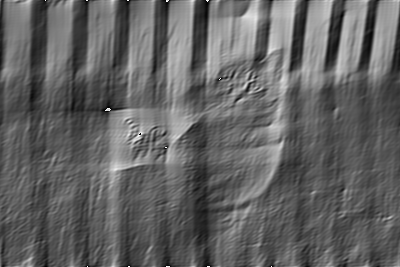

In [77]:
fft_90 = fft_size(redcat, 90)
as_image(fft_90)

SVD is basically identical to the original image whereas FFT is still blurry and starting to become recognizable.
<br>
SVD takes up 480,240 bytes with 90 components and FFT takes up 858,672 bytes with 90 components.

We would expect that SVD would be better for dimension reduction and FFT would be better for file compression. 
<br>
However, it appears that the way we have implemented FFT results in a coefficient matrix that is always the same size because each entry gets treated as a floating point number rather than an integer. 
<br>
As such, currently, the size of the FFT coefficient matrix is always `858,672` bytes which divided by `16` bytes is `53,667` which is `267*201`. This is the dimension of the coefficient matrix.